# Section A: Data Preprocessing

### Step A.0: Restart the session

In [1]:
try:
    from IPython import get_ipython
    get_ipython().magic('clear')
    get_ipython().magic('reset -f')
except:
    pass

### Step A.1: Import relevant libraries

In [104]:
#Standard libraries for data analysis:   
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm

# sklearn modules for data preprocessing:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#sklearn modules for Model Selection:
from sklearn.pipeline import Pipeline
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#sklearn modules for Model Evaluation & Improvement:    
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, accuracy_score  
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score

#Standard libraries for data visualization:
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib 
%matplotlib inline
color = sns.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve

#Miscellaneous Utilitiy Libraries:   
import random
import os
import re
import sys
import timeit
import string
import time
from datetime import datetime
from time import time
from dateutil.parser import parse
import joblib

### Step A.2: Set up the current working directory

In [3]:
filedict = 'LCDataDictionary2020Q3.xlsx'
filename = 'Loan_status_2007-2020Q3.csv'
absolute_path = os.path.abspath(os.path.dirname(filename))

### Step A.3: Import the dataset

In [4]:
chunksize = 500000
iterable = pd.read_csv(absolute_path+'/'+filename, iterator=True, chunksize=chunksize)
df = pd.concat([chunk[pd.to_datetime(chunk['issue_d']).dt.year >= 2015] for chunk in iterable])
df = df[df.term == ' 36 months'].reset_index(drop=True)

C:\Users\wangq\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3249: DtypeWarning: Columns (1,48,58,117,127,128,129,132,133,134,137) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\wangq\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3249: DtypeWarning: Columns (48,58,117,127,128,129,132,133,134,137) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\wangq\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3249: DtypeWarning: Columns (58) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\wangq\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3249: DtypeWarning: Columns (58,117) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(c

In [5]:
df.head()

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,0,120122535,12000.0,12000.0,12000.0,36 months,7.97%,375.88,A,A5,associate,10+ years,OWN,42000.0,Source Verified,Sep-2017,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,923xx,CA,27.74,0.0,Jun-1996,715.0,719.0,0.0,NaN,80.0,9.0,1.0,11457.0,37%,16.0,w,0.00,0.00,13500.44,13500.44,12000.00,1500.44,0.0,0.0,0.0,May-2020,2591.95,NaN,May-2020,694.0,690.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,30502.0,1.0,2.0,1.0,3.0,8.0,19045.0,73.0,2.0,4.0,7117.0,53.0,31000.0,1.0,1.0,2.0,7.0,3389.0,7144.0,53.9,0.0,0.0,131.0,255.0,1.0,1.0,0.0,14.0,NaN,8.0,NaN,0.0,2.0,6.0,2.0,2.0,7.0,7.0,9.0,6.0,9.0,0.0,0.0,0.0,3.0,100.0,0.0,1.0,0.0,57180.0,30502.0,15500.0,26180.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,1,119374887,32000.0,32000.0,32000.0,36 months,11.99%,1062.71,B,B5,Nurse,10+ years,MORTGAGE,155000.0,Source Verified,Sep-2017,Current,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Credit card refinancing,080xx,NJ,12.35,2.0,Sep-2005,715.0,719.0,1.0,10.0,NaN,20.0,0.0,48309.0,34.1%,42.0,w,6158.89,6158.89,31838.67,31838.67,25841.11,5997.56,0.0,0.0,0.0,May-2020,0.00,Jul-2020,May-2020,674.0,670.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,405751.0,2.0,1.0,1.0,1.0,8.0,15582.0,78.0,4.0,7.0,14049.0,40.0,142600.0,0.0,2.0,2.0,8.0,22542.0,81313.0,34.5,0.0,0.0,91.0,144.0,1.0,1.0,3.0,1.0,24.0,1.0,10.0,0.0,7.0,10.0,12.0,27.0,3.0,18.0,36.0,10.0,20.0,0.0,0.0,0.0,5.0,94.9,0.0,0.0,0.0,527034.0,63891.0,124200.0,20034.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,CVD19SKIP,INCOMECURT,ACTIVE,2.0,0.00,Apr-2020,Jun-2020,Apr-2020,2.0,0.0,ACTIVE,123.08000,6189.66,1062.71,N
2,3,120122034,16000.0,16000.0,16000.0,36 months,7.97%,5

In [6]:
print(df.groupby([pd.to_datetime(df.issue_d).dt.year,'term'])['id'].count().rename("count"))

issue_d  term      
2015      36 months    283173
2016      36 months    323495
2017      36 months    320419
2018      36 months    344671
2019      36 months    349414
2020      36 months    100909
Name: count, dtype: int64


### Step A.4: Create and Check target variable distribution

In [7]:
# Creating objective variable
df['Default_flg'] = np.where(df.loan_status == 'Charged Off', 1, 
                                 np.where(df.loan_status == 'Default', 1, 0))
print(df.groupby(['loan_status','Default_flg'])['id'].count().rename("count"))
print("df.shape: ", df.shape)
df.info()
#print(df.head())

loan_status         Default_flg
Charged Off         1              173869
Current             0              645536
Default             1                 307
Fully Paid          0              883872
In Grace Period     0                5793
Issued              0                1573
Late (16-30 days)   0                1650
Late (31-120 days)  0                9481
Name: count, dtype: int64
df.shape:  (1722081, 143)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1722081 entries, 0 to 1722080
Columns: 143 entries, Unnamed: 0 to Default_flg
dtypes: float64(106), int32(1), int64(1), object(35)
memory usage: 1.8+ GB


In [8]:
#df.groupby(pd.to_datetime(df.issue_d).dt.year).loan_status.value_counts(ascending=False,dropna=False)
c = df.groupby([pd.to_datetime(df.issue_d).dt.year,'loan_status'])['id'].count().rename("count")
print((100* c/c.groupby(level=[0]).sum()).round(2).astype(str) + '%')

issue_d  loan_status       
2015     Charged Off           14.89%
         Fully Paid            85.11%
2016     Charged Off           15.86%
         Current                0.01%
         Default                0.02%
         Fully Paid            84.11%
         In Grace Period         0.0%
         Late (16-30 days)       0.0%
         Late (31-120 days)     0.01%
2017     Charged Off           13.28%
         Current               21.93%
         Default                0.04%
         Fully Paid            63.83%
         In Grace Period        0.32%
         Late (16-30 days)      0.09%
         Late (31-120 days)     0.51%
2018     Charged Off            8.39%
         Current               56.05%
         Default                0.02%
         Fully Paid             33.8%
         In Grace Period        0.56%
         Late (16-30 days)      0.16%
         Late (31-120 days)     1.02%
2019     Charged Off            2.54%
         Current               82.07%
         Default      

In [137]:
c = df.groupby(['application_type','Default_flg'])['id'].count().rename("count")
print((100* c/c.groupby(level=[0]).sum()).round(2).astype(str) + '%')

application_type  Default_flg
Individual        0              89.68%
                  1              10.32%
Joint App         0              92.62%
                  1               7.38%
Name: count, dtype: object


In [140]:
print(df.groupby(['application_type','Default_flg'])['annual_inc'].mean().rename("mean"))
print(df.groupby(['application_type','Default_flg'])['annual_inc_joint'].mean().rename("mean"))

application_type  Default_flg
Individual        0              80966.421882
                  1              70355.613630
Joint App         0              63379.364252
                  1              53201.015639
Name: mean, dtype: float64
application_type  Default_flg
Individual        0                        NaN
                  1                        NaN
Joint App         0              129785.472439
                  1              110974.013259
Name: mean, dtype: float64


Since we observe lower default rate for joint application, **application_type** can be used as a feature. Also, we will replace annual_inc by annual_inc_joint for __Joint App__.

In [ ]:
c = df.groupby([pd.to_datetime(df.issue_d).dt.year,'Default_flg'])['id'].count().rename("count")
print((100* c/c.groupby(level=[0]).sum()).round(2).astype(str) + '%')

About 85% of the loans have been fully paid and 15% have charged off, so we have a somewhat unbalanced classification problem.

In [10]:
print(df.info())
df.describe(include='all') # analytical summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1722081 entries, 0 to 1722080
Columns: 143 entries, Unnamed: 0 to Default_flg
dtypes: float64(106), int32(1), int64(1), object(35)
memory usage: 1.8+ GB
None


,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,Default_flg
count,1.722081e+06,1722081.0,1.722081e+06,1.722081e+06,1.722081e+06,1722081,1722081,1.722081e+06,1722081,1722081,1542217,1580867,1722081,1.722081e+06,1722081,1722081,1722081,1722081,1722081,1722081,1706059,1722080,1722081,1.720327e+06,1.722081e+06,1722081,1.722081e+06,1.722081e+06,1.722081e+06,835140.000000,261437.000000,1.722081e+06,1.722081e+06,1.722081e+06,1720348,1.722081e+06,1722081,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1718637,1.722081e+06,664340,1722048,1.722081e+06,1.722081e+06,1.722081e+06,451242.000000,1722081.0,1722081,1.193680e+05,119365.000000,110944,1.722081e+06,1.722081e+06,1.722081e+06,1.453800e+06,1.453800e+06,1.453800e+06,1.453800e+06,1.404866e+06,1.453800e+06,1.238025e+06,1.453800e+06,1.453800e+06,1.453800e+06,1.453543e+06,1.722081e+06,1.453800e+06,1.453800e+06,1.453800e+06,1.722081e+06,1.721999e+06,1.700660e+06,1.699758e+06,1.722081e+06,1.722081e+06,1.663645e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.701830e+06,396448.000000,1.522518e+06,568822.000000,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722080e+06,1.722081e+06,1.722081e+06,1.664959e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722079e+06,1.700333e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.118510e+05,111852.000000,111852.000000,111852,111852.000000,111852.000000,111852.000000,109540.000000,111852.000000,111852.000000,111852.000000,111852.000000,1697903,85363,85358,85361,85363.000000,109544.000000,85363,85363,85363,85363.000000,85363.000000,85202,107919.000000,109544.000000,109544.000000,1722081,1.722081e+06
unique,NaN,1722081.0,NaN,NaN,NaN,1,318,NaN,7,35,3

## Section B: Variables Profiling

There're **140+** variables that represent different aspects of a customer's profile. The groups and variables belonging to each group are listed below:
<br>
<br>__1. (CSRP) Customer Self-Reported personal and financial profile:__ emp_title, emp_length, addr_state, home_ownership, annual_inc, purpose, title, annual_inc_joint
<br>**2. (CLCR) Customer Lending Club relationship:** id, loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment, grade, sub_grade, verification_status, issue_d, initial_list_status, policy_code, application_type, verification_status_joint
<br>**3. (CLCB) Customer Lending Club behaviors:** loan_status, pymnt_plan, out_prnc, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, next_pymnt_d, last_credit_pull_d, hardship_flag, hardship_type, hardship_reason, hardship_status, deferral_term, hardship_amount, hardship_start_date, hardship_end_date, payment_plan_start_date, hardship_length, hardship_dpd, hardship_loan_status, orig_projected_additional_accrued_interest, hardship_payoff_balance_amount, hardship_last_payment_amount, debt_settlement_flag
<br>__4. FICO:__ dti, dti_joint,	delinq_2yrs,	earliest_cr_line,	fico_range_low,	fico_range_high,	inq_last_6mths,	mths_since_last_delinq,	mths_since_last_record,	open_acc,	pub_rec	revol_bal,	revol_util,	total_acc,	last_fico_range_high,	last_fico_range_low,	collections_12_mths_ex_med,	mths_since_last_major_derog,	acc_now_delinq,	tot_coll_amt,	tot_cur_bal,	open_acc_6m,	open_act_il,	open_il_12m	open_il_24m,	mths_since_rcnt_il,	total_bal_il,	il_util,	open_rv_12m,	open_rv_24m,	max_bal_bc,	all_util,	total_rev_hi_lim,	inq_fi,	total_cu_tl,	inq_last_12m,	acc_open_past_24mths,	avg_cur_bal,	bc_open_to_buy,	bc_util,	chargeoff_within_12_mths,	delinq_amnt,	mo_sin_old_il_acct,	mo_sin_old_rev_tl_op,	mo_sin_rcnt_tl,	mort_acc,	mths_since_recent_bc,	mths_since_recent_bc_dlq,	mths_since_recent_inq,	mths_since_recent_revol_delinq,	num_accts_ever_120_pd,	num_actv_bc_tl,	num_actv_rev_tl,	num_bc_sats,	num_bc_tl,	num_il_tl,	num_op_rev_tl,	num_rev_accts,	num_rev_tl_bal_gt_0,	num_sats,	num_tl_120dpd_2m,	num_tl_30dpd,	num_tl_90g_dpd_24m,	num_tl_op_past_12m,	pct_tl_nvr_dlq,	percent_bc_gt_75,	pub_rec_bankruptcies,	tax_liens,	tot_hi_cred_lim,	total_bal_ex_mort,	total_bc_limit,	total_il_high_credit_limit,	revol_bal_joint,	sec_app_fico_range_low,	sec_app_fico_range_high,	sec_app_earliest_cr_line,	sec_app_inq_last_6mths,	sec_app_mort_acc,	sec_app_open_acc,	sec_app_revol_util,	sec_app_open_act_il,	sec_app_num_rev_accts,	sec_app_chargeoff_within_12_mths,	sec_app_collections_12_mths_ex_med
<br>**To be deleted:** zip_code, url

## Section C: Exploratory Data Analysis 
<br> Let’s try to explore and visualize our data set by doing distribution of independent variables to better understand the patterns in the data and to potentially form some hypothesis.

### Step C.0 Limit the Feature Space
<br>The full dataset has 140 features for each loan. We'll select features in two steps:
<br>Drop features with more than 30% of their data missing.
<br>Of the remaining features, choose only those that would be available to an investor before deciding to fund the loan.

#### C.0.1 Drop features missing more than 30% data

First calculate the percentage of missing data for each feature:

In [130]:
missing_fractions = df.isnull().mean().sort_values(ascending=False)
missing_fractions.head(10) #Top 10 features missing the most data

hardship_loan_status       0.950524
hardship_reason            0.950433
hardship_status            0.950431
deferral_term              0.950430
hardship_length            0.950430
hardship_type              0.950430
hardship_start_date        0.950430
payment_plan_start_date    0.950430
hardship_end_date          0.950430
hardship_dpd               0.950430
dtype: float64

Let's visualize the distribution of missing data percentages:

Text(0, 0.5, 'Feature count')

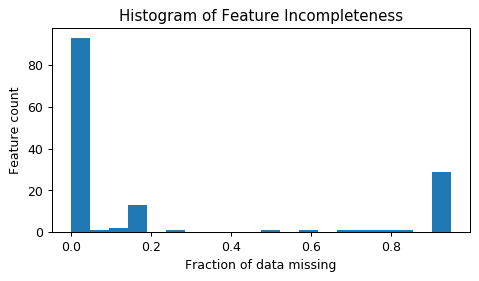

In [131]:
plt.figure(figsize=(6,3), dpi=90)
missing_fractions.plot.hist(bins=20)
plt.title('Histogram of Feature Incompleteness')
plt.xlabel('Fraction of data missing')
plt.ylabel('Feature count')

Above histogram shows there's a large gap between features missing "some" data (<20%) and those missing "lots" of data (>40%). Because it's generally very difficult to accurately impute data with more than 30% missing values, we drop such columns. Meanwhile, we will apply domain knowledge to do a second screening. Some columns can actually be used in feature engineering.
<br>First store all variables missing more than 30% data in an alphabetical list:

In [132]:
drop_list = sorted(list(missing_fractions[missing_fractions > 0.3].index))
print(drop_list)

['annual_inc_joint', 'deferral_term', 'dti_joint', 'hardship_amount', 'hardship_dpd', 'hardship_end_date', 'hardship_last_payment_amount', 'hardship_length', 'hardship_loan_status', 'hardship_payoff_balance_amount', 'hardship_reason', 'hardship_start_date', 'hardship_status', 'hardship_type', 'mths_since_last_delinq', 'mths_since_last_major_derog', 'mths_since_last_record', 'mths_since_recent_bc_dlq', 'mths_since_recent_revol_delinq', 'next_pymnt_d', 'orig_projected_additional_accrued_interest', 'payment_plan_start_date', 'revol_bal_joint', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 'sec_app_earliest_cr_line', 'sec_app_fico_range_high', 'sec_app_fico_range_low', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_num_rev_accts', 'sec_app_open_acc', 'sec_app_open_act_il', 'sec_app_revol_util', 'verification_status_joint']


Here we do want to keep __'annual_inc_joint', 'dti_joint', 'revol_bal_joint', 'verification_status_joint'__. We will replace with these values for Joint App.

In [147]:
kp = ['annual_inc_joint', 'dti_joint', 'revol_bal_joint', 'verification_status_joint']
drop_list = list(set(drop_list) - set(kp))

How many features will be dropped?

In [148]:
len(drop_list)

31

In [149]:
#Drop these features:
df.drop(labels=drop_list, axis=1, inplace=True)

In [150]:
df.shape

(1722081, 114)

## Section D: Feature Engineering

### Step D.0: Feature Selection

| No. | Feature   | Feature Type    | Feature Engineering   | Model Type   | Model Phase   |
|---:|:-------------|:-----------|:------|:------|:------|
| 1 | sub_grade  | Categorical       | Ordinal Transform   | Logistic Regression     | Phase I     |
| 2 | emp_length  | Categorical    | Ordinal Transform   | Logistic Regression     | Phase I     |
| 3 | addr_state  | Categorical    | OneHotEncoding   | Logistic Regression     | Phase I     |
| 4 | dti / dti_joint  | Numerical    | None   | Logistic Regression     | Phase I     |
| 5 | fico_range_low / fico_range_high  | Numerical    | (fico_range_low+fico_range_high) / 2   | Logistic Regression     | Phase I     |
| 6 | home_ownership  | Categorical    | OneHotEncoding   | Logistic Regression     | Phase I     |
| 7 | purpose  | Categorical    | OneHotEncoding   | Logistic Regression     | Phase I     |
| 8 | annual_inc / annual_inc_joint  | Numerical    | Log   | Logistic Regression     | Phase I     |
| 9 | application_type  | Categorical    | Dummy Transform   | Logistic Regression     | Phase I     |
| 10 | pub_rec_bankruptcies  | Numerical    | None   | Logistic Regression     | Phase I     |
| 11 | earliest_cr_line  | Date    | 2020-year(earliest_cr_line)   | Logistic Regression     | Phase I     |
| 12 | funded_amnt  | Numerical    | Log   | Logistic Regression     | Phase I     |
| 13 | int_rate  | Numerical    | None   | Logistic Regression     | Phase I     |
| 14 | verification_status / verification_status_joint  | Categorical    | None   | Logistic Regression     | Phase I     |
| 15 | hardship_flag  | Categorical    | Dummy Transform   | Random Forest     | Phase II     |
| 16 | hardship_reason  | Categorical    | OneHotEncoding   | Random Forest     | Phase II     |
| 17 | hardship_loan_status  | Categorical    | OneHotEncoding   | Random Forest     | Phase II     |
| 18 | deferral_term  | Numerical    | None   | Random Forest     | Phase II     |
| Train/Test Split | year  | Numerical    | None   | All     | All     |
| Target | loan_status  | Categorical    | None   | All     | All     |
| Target | Default_flg  | Numerical    | None   | All     | All     |

In [303]:
df['year'] = pd.to_datetime(df.issue_d).dt.year
df['month'] = pd.to_datetime(df.issue_d).dt.month
df['cr_hist'] = pd.to_datetime(df.earliest_cr_line).dt.year.map(lambda x: 2020-x)
feature_raw = df[['sub_grade','emp_length','addr_state','dti','dti_joint','fico_range_low','fico_range_high','home_ownership', 
'purpose', 'annual_inc','annual_inc_joint','application_type','pub_rec_bankruptcies','funded_amnt','int_rate',
'verification_status','verification_status_joint','cr_hist','month','year','loan_status','Default_flg']]
#'pub_rec_bankruptcies','hardship_flag','hardship_reason','hardship_loan_status','deferral_term',

feature_raw['dti'] = np.where(df.application_type == 'Individual', feature_raw['dti'], feature_raw['dti_joint'])
feature_raw['annual_inc'] = np.where(df.application_type == 'Individual', feature_raw['annual_inc'], feature_raw['annual_inc_joint'])
feature_raw['verification_status'] = np.where(df.application_type == 'Individual', feature_raw['verification_status'], feature_raw['verification_status_joint'])
feature_raw['fico_avg'] = feature_raw[['fico_range_low', 'fico_range_high']].mean(axis=1)

feature_raw.drop(['dti_joint','annual_inc_joint','verification_status_joint','fico_range_low','fico_range_high'], axis=1, inplace=True)

C:\Users\wangq\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\wangq\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\wangq\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [292]:
feature_raw.describe(include='all')

,sub_grade,emp_length,addr_state,dti,home_ownership,purpose,annual_inc,application_type,pub_rec_bankruptcies,funded_amnt,int_rate,verification_status,cr_hist,month,year,loan_status,Default_flg,fico_avg
count,1722081,1580867,1722081,1.722078e+06,1722081,1722081,1.722081e+06,1722081,1.722081e+06,1.722081e+06,1722081,1713657,1.722081e+06,1.722081e+06,1.722081e+06,1722081,1.722081e+06,1.722081e+06
unique,35,11,50,NaN,5,14,NaN,2,NaN,NaN,318,3,NaN,NaN,NaN,8,NaN,NaN
top,A5,10+ years,CA,NaN,MORTGAGE,debt_consolidation,NaN,Individual,NaN,NaN,5.32%,Source Verified,NaN,NaN,NaN,Fully Paid,NaN,NaN
freq,120404,530129,242007,NaN,781043,908683,NaN,1602713,NaN,NaN,47028,693854,NaN,NaN,NaN,883872,NaN,NaN
mean,NaN,NaN,NaN,1.823783e+01,NaN,NaN,8.323521e+04,NaN,1.278494e-01,1.311324e+04,NaN,NaN,1.896381e+01,6.453633e+00,2.017265e+03,NaN,1.011427e-01,7.026125e+02
std,NaN,NaN,NaN,8.624683e+00,NaN,NaN,1.008444e+05,NaN,3.611139e-01,9.095175e+03,NaN,NaN,8.128112e+00,3.454197e+00,1.521346e+00,NaN,3.015177e-01,3.448499e+01
min,NaN,NaN,NaN,-1.000000e+00,NaN,NaN,1.900000e+03,NaN,0.000000e+00,1.000000e+03,NaN,NaN,3.000000e+00,1.000000e+00,2.015000e+03,NaN,0.000000e+00,6.620000e+02
25%,NaN,NaN,NaN,1.174000e+01,NaN,NaN,4.708400e+04,NaN,0.000000e+00,6.000000e+03,NaN,NaN,1.400000e+01,3.000000e+00,2.016000e+03,NaN,0.000000e+00,6.770000e+02
50%,NaN,NaN,NaN,1.766000e+01,NaN,NaN,6.800000e+04,NaN,0.000000e+00,1.000000e+04,NaN,NaN,1.700000e+01,7.000000e+00,2.017000e+03,NaN,0.000000e+00,6.970000e+02
75%,NaN,NaN,NaN,2.433000e+01,NaN,NaN,1.000000e+05,NaN,0.000000e+00,1.800000e+04,NaN,NaN,2.300000e+01,9.000000e+00,2.019000e+03,NaN,0.000000e+00,7.220000e+02


### Step D.1: Missing data imputation

In [293]:
#feature_raw.isna().any()
#check nan percentage
def check_na(df):
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
    return missing_value_df
check_na(feature_raw)

,column_name,percent_missing
sub_grade,sub_grade,0.000000
emp_length,emp_length,8.200195
addr_state,addr_state,0.000000
dti,dti,0.000174
home_ownership,home_ownership,0.000000
purpose,purpose,0.000000
annual_inc,annual_inc,0.000000
application_type,application_type,0.000000
pub_rec_bankruptcies,pub_rec_bankruptcies,0.000000
funded_amnt,funded_amnt,0.000000


In [304]:
#fill in na value for emp_length and dti
feature_raw['emp_length'] = feature_raw['emp_length'].fillna('unknown')
feature_raw['dti'] = feature_raw['dti'].fillna(value=feature_raw['dti'].mean(), inplace=False)
feature_raw['verification_status'] = feature_raw['verification_status'].fillna('Not Verified')

C:\Users\wangq\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\wangq\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\wangq\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [305]:
# Create feature dataset for Logistic Regression
feature_raw_lr = feature_raw[['sub_grade','emp_length','addr_state','dti','fico_avg','home_ownership','purpose','annual_inc',  
                              'application_type','pub_rec_bankruptcies','funded_amnt','int_rate','verification_status','cr_hist',
                              'month','year','loan_status','Default_flg']]

In [306]:
#check nan percentage
def check_na(df):
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
    return missing_value_df
check_na(feature_raw_lr)

,column_name,percent_missing
sub_grade,sub_grade,0.0
emp_length,emp_length,0.0
addr_state,addr_state,0.0
dti,dti,0.0
fico_avg,fico_avg,0.0
home_ownership,home_ownership,0.0
purpose,purpose,0.0
annual_inc,annual_inc,0.0
application_type,application_type,0.0
pub_rec_bankruptcies,pub_rec_bankruptcies,0.0


In [297]:
feature_raw_lr.dtypes

sub_grade                object
emp_length               object
addr_state               object
dti                     float64
fico_avg                float64
home_ownership           object
purpose                  object
annual_inc              float64
application_type         object
pub_rec_bankruptcies    float64
funded_amnt             float64
int_rate                 object
verification_status      object
cr_hist                   int64
month                     int64
year                      int64
loan_status              object
Default_flg               int32
dtype: object

In [307]:
print(feature_raw_lr.corr(method ='pearson'))

                           dti  fico_avg  annual_inc  pub_rec_bankruptcies  \
dti                   1.000000 -0.034301   -0.121736             -0.019783   
fico_avg             -0.034301  1.000000    0.058771             -0.189521   
annual_inc           -0.121736  0.058771    1.000000             -0.035676   
pub_rec_bankruptcies -0.019783 -0.189521   -0.035676              1.000000   
funded_amnt           0.017204  0.097517    0.272423             -0.074919   
cr_hist               0.066890  0.086180    0.104350              0.051509   
month                -0.010385  0.000733   -0.000183              0.002782   
year                  0.012185  0.138905    0.064318             -0.039936   
Default_flg           0.050405 -0.115494   -0.036008              0.035390   

                      funded_amnt   cr_hist     month      year  Default_flg  
dti                      0.017204  0.066890 -0.010385  0.012185     0.050405  
fico_avg                 0.097517  0.086180  0.000733  0.1389

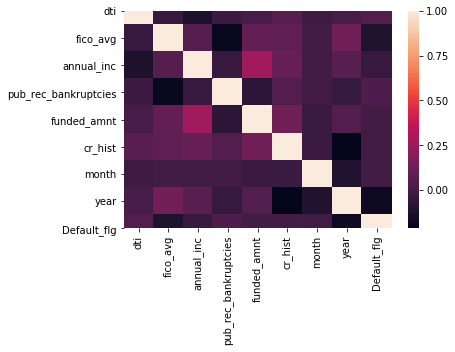

In [308]:
sns.heatmap(feature_raw_lr.corr())
#, annot = True, fmt='.1g', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=0, cbar_kws= {'orientation': 'horizontal'}

### Step D.2: Categorical data encoding

In [309]:
categorical_features = ['sub_grade','emp_length','addr_state','home_ownership','verification_status','purpose','application_type']
for col in categorical_features:
    print(f"{feature_raw_lr[col].str.split(',').explode().nunique()} unique levels in {col}")

35 unique levels in sub_grade
12 unique levels in emp_length
50 unique levels in addr_state
5 unique levels in home_ownership
3 unique levels in verification_status
14 unique levels in purpose
2 unique levels in application_type


In [310]:
print(f"sub_grade: {feature_raw_lr.sub_grade.unique()}")
print(f"emp_length: {feature_raw_lr.emp_length.unique()}")
print(f"addr_state: {feature_raw_lr.addr_state.unique()}")
print(f"home_ownership: {feature_raw_lr.home_ownership.unique()}")
print(f"verification_status: {feature_raw_lr.verification_status.unique()}")
print(f"purpose: {feature_raw_lr.purpose.unique()}")
print(f"application_type: {feature_raw_lr.application_type.unique()}")
#print(f"hardship_flag: {feature_raw_lr.hardship_flag.unique()}")

sub_grade: ['A5' 'B5' 'A3' 'B1' 'C5' 'C2' 'C4' 'E2' 'G2' 'E3' 'D5' 'C1' 'A2' 'B4'
 'C3' 'D4' 'A1' 'B2' 'A4' 'F4' 'D1' 'B3' 'D3' 'D2' 'E4' 'F2' 'F3' 'E1'
 'F1' 'G1' 'F5' 'E5' 'G4' 'G5' 'G3']
emp_length: ['10+ years' '5 years' '< 1 year' '3 years' '4 years' 'unknown' '6 years'
 '2 years' '7 years' '8 years' '1 year' '9 years']
addr_state: ['CA' 'NJ' 'VA' 'TX' 'IL' 'OR' 'NY' 'MA' 'CT' 'FL' 'MI' 'SC' 'WA' 'NC'
 'NV' 'NM' 'MS' 'LA' 'PA' 'MD' 'AZ' 'KY' 'GA' 'CO' 'OH' 'HI' 'MT' 'IN'
 'MO' 'AL' 'MN' 'NE' 'WI' 'AR' 'KS' 'TN' 'OK' 'NH' 'ME' 'WY' 'ID' 'RI'
 'DE' 'VT' 'AK' 'ND' 'UT' 'SD' 'DC' 'WV']
home_ownership: ['OWN' 'MORTGAGE' 'RENT' 'ANY' 'NONE']
verification_status: ['Source Verified' 'Not Verified' 'Verified']
purpose: ['debt_consolidation' 'credit_card' 'other' 'medical' 'home_improvement'
 'major_purchase' 'car' 'moving' 'small_business' 'vacation'
 'renewable_energy' 'house' 'educational' 'wedding']
application_type: ['Individual' 'Joint App']


In [311]:
# sub_grade: ordinal encoding
map_dict={'A1': 1, 'A2': 2, 'A3': 3, 'A4': 4, 'A5': 5,
          'B1': 6, 'B2': 7, 'B3': 8, 'B4': 9, 'B5': 10,
          'C1': 11, 'C2': 12, 'C3': 13, 'C4': 14, 'C5': 15,
          'D1': 16, 'D2': 17, 'D3': 18, 'D4': 19, 'D5': 20,
          'E1': 21, 'E2': 22, 'E3': 23, 'E4': 24, 'E5': 25,
          'F1': 26, 'F2': 27, 'F3': 28, 'F4': 29, 'F5': 30,
          'G1': 31, 'G2': 32, 'G3': 33, 'G4': 34, 'G5': 35,
         }

class sub_grade_ordinal_Transformer():
    def __init__(self):
        self.counts = 0
        
    def transform(self, X, y=None):
        # input X， series
        df=pd.DataFrame()
        df['sub_grade']=X.sub_grade.map(map_dict)
        return df                                                                                
    
    def fit_transform(self, X, y=None):
        #self.fit(X)
        return self.transform(X)

sgot = sub_grade_ordinal_Transformer()
sgot.fit_transform(feature_raw_lr).head()

feature_raw_lr[['sub_grade']]=sgot.transform(feature_raw_lr)
#plt.scatter(feature_raw_lr['sub_grade'],feature_raw_lr['Default_flg'])

In [312]:
# emp_length: ordinal encoding
map_dict={'< 1 year': 0, '1 year': 1, '2 years': 2, '3 years': 3, '4 years': 4, '5 years': 5,  
          '6 years': 6, '7 years': 7, '8 years': 8, '9 years': 9, '10+ years': 10, 'unknown': 11}

class emp_length_ordinal_Transformer():
    def __init__(self):
        self.counts = 0
        
    def transform(self, X, y=None):
        # input X， series
        df=pd.DataFrame()
        df['emp_length']=X.emp_length.map(map_dict)
        return df                                                                                
    
    def fit_transform(self, X, y=None):
        #self.fit(X)
        return self.transform(X)

elot = emp_length_ordinal_Transformer()
elot.fit_transform(feature_raw_lr).head()

feature_raw_lr[['emp_length']]=elot.transform(feature_raw_lr)
#plt.scatter(feature_raw_lr['emp_length'],feature_raw_lr['Default_flg'])

In [315]:
# Dummy transfer: 'addr_state', 'home_ownership', 'purpose','application_type'
feature_raw_dt_lr = pd.get_dummies(feature_raw_lr, columns=['addr_state','home_ownership','purpose','application_type','verification_status'], drop_first=True)

In [316]:
#Int_rate transformation
feature_raw_dt_lr['int_rate'] = feature_raw_dt_lr['int_rate'].map(lambda x: float(x.strip('%'))*1 if type(x)==str else x)
feature_raw_dt_lr.head()

,sub_grade,emp_length,dti,fico_avg,annual_inc,pub_rec_bankruptcies,funded_amnt,int_rate,cr_hist,month,year,loan_status,Default_flg,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OWN,home_ownership_RENT,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,application_type_Joint App,verification_status_Source Verified,verification_status_Verified
0,5,10,27.74,717.0,42000.0,1.0,12000.0,7.97,24,9,2017,Fully Paid,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,10,10,12.35,717.0,155000.0,0.0,32000.0,11.99,15,9,2017,Current,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,5,5,15.94,702.0,79077.0,0.0,16000.0,7.97,20,9,2017,Current,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,0,17.87,787.0,163000.0,0.0,33000.0,7.21,15,9,2017,Late (31-120 days),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0
4,5,10,12.27,712.0,32000.0,1.0,7000.0,7.97,17,9,2017,Current,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


### Step D.3: Numerical data binning (tbd)

In [317]:
feature_raw_dt_lr['annual_inc'] = np.log(feature_raw_dt_lr.annual_inc)
feature_raw_dt_lr.describe(include='all')

,sub_grade,emp_length,dti,fico_avg,annual_inc,pub_rec_bankruptcies,funded_amnt,int_rate,cr_hist,month,year,loan_status,Default_flg,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OWN,home_ownership_RENT,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,application_type_Joint App,verification_status_Source Verified,verification_status_Verified
count,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1722081,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fully Paid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,883872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.171439e+00,6.103650e+00,1.823783e+01,7.026125e+02,1.114113e+01,1.278494e-01,1.311324e+04,1.185154e+01,1.896381e+01,6.453633e+00,2.017265e+03,NaN,1.011427e-01,1.118821e-02,7.518229e-03,2.444078e-02,1.405317e-01,2.055072e-02,1.589472e-02,2.286768e-03,2.791971e-03,7.512248e-02,3.230975e-02,4.502111e-03,2.701383e-03,4.052539e-02,1.637437e-02,7.978138e-03,9.277148e-03,1.084792e-02,2.281368e-02,2.294375e-02,2.842491e-03,2.587567e-02,1.685577e-02,1.567464e-02,6.285999e-03,2.777454e-03,2.686633e-02,2.037651e-03,4.474819e-03,4.942857e-03,3.614987e-02,5.208234e-03,1.517989e-02,8.316566e-02,3.217619e-02,8.892729e-03,1.200176e-02,3.186319e-02,4.383650e-03,1.211557e-02,1.9499

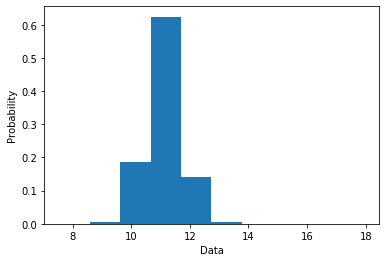

In [318]:
plt.hist(feature_raw_dt_lr['annual_inc'], density=True, bins=10)  # density=False would make counts
plt.ylabel('Probability')
plt.xlabel('Data');

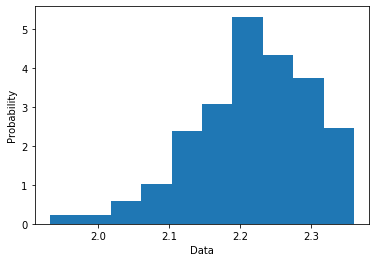

In [320]:
feature_raw_dt_lr['funded_amnt'] = np.log(feature_raw_dt_lr.funded_amnt)
plt.hist(feature_raw_dt_lr['funded_amnt'], density=True, bins=10)  # density=False would make counts
plt.ylabel('Probability')
plt.xlabel('Data');

## Section E: Model Development

### Benchmark Model - Logistic Regression 

### Step E.1: Split training and test datasets

In [321]:
train_raw = feature_raw_dt_lr[(feature_raw_dt_lr.year == 2015) &
                              ((feature_raw_dt_lr.loan_status == 'Fully Paid') | 
                              (feature_raw_dt_lr.loan_status == 'Charged Off') |
                              (feature_raw_dt_lr.loan_status == 'Default'))].reset_index(drop=True)
test_raw = feature_raw_dt_lr[(feature_raw_dt_lr.year == 2016) &
                              ((feature_raw_dt_lr.loan_status == 'Fully Paid') | 
                              (feature_raw_dt_lr.loan_status == 'Charged Off') |
                              (feature_raw_dt_lr.loan_status == 'Default'))].reset_index(drop=True)
train_raw.head()
#test_raw.head()

,sub_grade,emp_length,dti,fico_avg,annual_inc,pub_rec_bankruptcies,funded_amnt,int_rate,cr_hist,month,year,loan_status,Default_flg,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OWN,home_ownership_RENT,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,application_type_Joint App,verification_status_Source Verified,verification_status_Verified
0,10,10,34.80,702.0,10.645425,0.0,2.195801,11.48,26,12,2015,Fully Paid,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4,10,26.02,747.0,11.599103,0.0,2.315169,7.49,19,12,2015,Fully Paid,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,9,18.83,837.0,11.082143,0.0,2.292887,5.32,29,12,2015,Fully Paid,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,10,13.28,697.0,11.512925,0.0,2.163267,7.49,26,12,2015,Fully Paid,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,26.59,782.0,11.385092,0.0,2.279895,5.32,19,12,2015,Fully Paid,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [322]:
print(train_raw.shape)
print(test_raw.shape)

(283173, 82)
(323436, 82)


In [323]:
print(train_raw.groupby(['year','loan_status','Default_flg'])['annual_inc'].count().rename("count"))
print(test_raw.groupby(['year','loan_status','Default_flg'])['annual_inc'].count().rename("count"))

year  loan_status  Default_flg
2015  Charged Off  1               42178
      Fully Paid   0              240995
Name: count, dtype: int64
year  loan_status  Default_flg
2016  Charged Off  1               51299
      Default      1                  61
      Fully Paid   0              272076
Name: count, dtype: int64


### Step E.2: Split the dataset into dependent and independent variables

In [324]:
features = list(train_raw.columns)
to_remove = set(['Default_flg','month','year','loan_status'])
target = 'Default_flg'
features = [ e for e in features if e not in to_remove ]
print(features)
print(target)

['sub_grade', 'emp_length', 'dti', 'fico_avg', 'annual_inc', 'pub_rec_bankruptcies', 'funded_amnt', 'int_rate', 'cr_hist', 'addr_state_AL', 'addr_state_AR', 'addr_state_AZ', 'addr_state_CA', 'addr_state_CO', 'addr_state_CT', 'addr_state_DC', 'addr_state_DE', 'addr_state_FL', 'addr_state_GA', 'addr_state_HI', 'addr_state_ID', 'addr_state_IL', 'addr_state_IN', 'addr_state_KS', 'addr_state_KY', 'addr_state_LA', 'addr_state_MA', 'addr_state_MD', 'addr_state_ME', 'addr_state_MI', 'addr_state_MN', 'addr_state_MO', 'addr_state_MS', 'addr_state_MT', 'addr_state_NC', 'addr_state_ND', 'addr_state_NE', 'addr_state_NH', 'addr_state_NJ', 'addr_state_NM', 'addr_state_NV', 'addr_state_NY', 'addr_state_OH', 'addr_state_OK', 'addr_state_OR', 'addr_state_PA', 'addr_state_RI', 'addr_state_SC', 'addr_state_SD', 'addr_state_TN', 'addr_state_TX', 'addr_state_UT', 'addr_state_VA', 'addr_state_VT', 'addr_state_WA', 'addr_state_WI', 'addr_state_WV', 'addr_state_WY', 'home_ownership_MORTGAGE', 'home_ownership_N

In [325]:
X_train = train_raw[features]
y_train = train_raw[target]

X_test = test_raw[features]
y_test = test_raw[target]

In [326]:
X_train.head()

,sub_grade,emp_length,dti,fico_avg,annual_inc,pub_rec_bankruptcies,funded_amnt,int_rate,cr_hist,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OWN,home_ownership_RENT,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,application_type_Joint App,verification_status_Source Verified,verification_status_Verified
0,10,10,34.80,702.0,10.645425,0.0,2.195801,11.48,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4,10,26.02,747.0,11.599103,0.0,2.315169,7.49,19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,9,18.83,837.0,11.082143,0.0,2.292887,5.32,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,10,13.28,697.0,11.512925,0.0,2.163267,7.49,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,26.59,782.0,11.385092,0.0,2.279895,5.32,19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [327]:
print(y_train.value_counts())
print(y_test.value_counts())

0    240995
1     42178
Name: Default_flg, dtype: int64
0    272076
1     51360
Name: Default_flg, dtype: int64


In [328]:
print(train_raw.groupby(['year','loan_status','Default_flg'])['annual_inc'].count().rename("count"))
X_train.shape

year  loan_status  Default_flg
2015  Charged Off  1               42178
      Fully Paid   0              240995
Name: count, dtype: int64


(283173, 78)

### Step E.3: Pipeline construction

In [329]:
%%time
steps = [('rescale', MinMaxScaler()),
         ('poly', PolynomialFeatures()),
         ('LR', LogisticRegression(random_state = 0, class_weight = 'balanced'))]
model = Pipeline(steps)
model = model.fit(X_train, y_train)

C:\Users\wangq\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Wall time: 3min 6s


In [330]:
%%time
y_train_pred = model.predict(X_train)
unique, frequency = np.unique(y_train_pred,
                              return_counts = True) 
print("Training: predicted values and counts:\n", np.asarray((unique, frequency )))
y_test_pred = model.predict(X_test)
unique, frequency = np.unique(y_test_pred,
                              return_counts = True) 
print("Testing: predicted values and counts:\n", np.asarray((unique, frequency )))

Training: predicted values and counts:
 [[     0      1]
 [160638 122535]]
Testing: predicted values and counts:
 [[     0      1]
 [178701 144735]]
Wall time: 2min 40s


In [331]:
from sklearn.metrics import confusion_matrix

print('training')
print(confusion_matrix(y_train, y_train_pred))
print('testing')
print(confusion_matrix(y_test, y_test_pred))

training
[[147452  93543]
 [ 13186  28992]]
testing
[[161878 110198]
 [ 16823  34537]]


In [332]:
%%time
y_train_proba = model.predict_proba(X_train)
#print(y_train_proba)
y_test_proba = model.predict_proba(X_test)
#print(y_test_proba[:,1])

Wall time: 2min 46s


In [333]:
%%time
from sklearn.metrics import roc_auc_score
print('Training roc_auc_scores: %.3f' % roc_auc_score(y_train, y_train_proba[:,1]))
#print('Training roc_auc_scores: %.3f' % roc_auc_score(y_train, model.decision_function(X_train)))
print('Testing roc_auc_scores: %.3f' % roc_auc_score(y_test, model.decision_function(X_test)))

Training roc_auc_scores: 0.705
Testing roc_auc_scores: 0.686
Wall time: 1min 41s


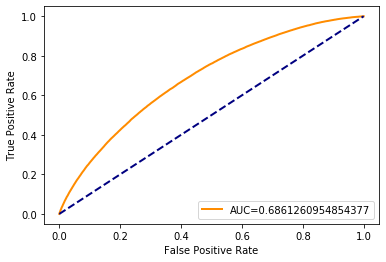

Wall time: 1.23 s


In [334]:
%%time
from sklearn.metrics import roc_curve, auc
#define metrics
y_pred_proba = y_test_proba[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
lw = 2
#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc),color='darkorange',lw=lw)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

#### Over sampling minority class - SMOTE

In [337]:
from imblearn.under_sampling import RandomUnderSampler 
from imblearn.over_sampling import SMOTE

In [351]:
# Now let's compare a few different ratios of minority class to majority class
ratios = [0.5, 0.7, 1] #0.1, 0.25, 0.35,  
names = ['0.5', '0.7', 'even'] #'0.1', '0.25', '0.35',
colors = sns.color_palette('Set2')

In [371]:
#plt.figure(figsize=(5, 5))

for n, ratio in enumerate(ratios):
    # Fit a model
    smote = SMOTE(sampling_strategy=ratio, random_state=0, k_neighbors=5, n_jobs=-1)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train) 
    model = Pipeline(steps)
    model = model.fit(X_train_resampled, y_train_resampled)
    print(model_log)

    # Predict
    y_test_pred = model.predict(X_test)

    y_test_prob = model.predict_proba(X_test)

    fpr, tpr, thres = metrics.roc_curve(y_test, y_test_prob[::,1])
    auc = metrics.roc_auc_score(y_test, y_test_prob[::,1])
    #fpr, tpr, thres = roc_curve(y_test, model.decision_function(X_test))
    
    print('AUC for {}: {}'.format(names[n], auc))
    print('-------------------------------------------------------------------------------------')
    #plt.plot(fpr, tpr, color=colors[n],
             #lw=2, label='ROC curve {}, AUC:{}'.format(names[n], round(auc,3)))
'''
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.yticks([i/10.0 for i in range(11)])
plt.xticks([i/10.0 for i in range(11)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
'''

C:\Users\wangq\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
AUC for 0.5: 0.6850691434530914
-------------------------------------------------------------------------------------


MemoryError: 

### TBD - Random Forest Model

Next we train a random forest model. Note that data standardization is not necessary for a random forest.

In [126]:
%%time
steps = [('rescale', MinMaxScaler()),
         #('poly', PolynomialFeatures()),
         ('tree', RandomForestClassifier(n_jobs=-1, random_state=1))] 
model = Pipeline(steps)

Wall time: 0 ns


The random forest takes very long to train, so we don't test different hyperparameter choices. We'll still use GridSearchCV for the sake of consistency.

In [127]:
param_grid_rfc = {
    'model__n_estimators': [50] # The number of randomized trees to build
}

The AUROC will always improve (with decreasing gains) as the number of estimators increases, but it's not necessarily worth the extra training time and model complexity.

In [128]:
grid_rfc = GridSearchCV(estimator=model, param_grid=param_grid_rfc, scoring='roc_auc', n_jobs=-1, pre_dispatch='2*n_jobs', cv=5, verbose=1, return_train_score=False)

In [125]:
model = grid_rfc.fit(X_train, y_train) 

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


ValueError: Invalid parameter model for estimator Pipeline(memory=None,
         steps=[('rescale', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('tree',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators='warn', n_jobs=-1,
                                        oob_score=False, random_state=1,
                                        verbose=0, warm_start=False))],
         verbose=False). Check the list of available parameters with `estimator.get_params().keys()`.

Mean cross-validated AUROC score of the random forest:

In [ ]:
grid_rfc.best_score_

In [102]:
%%time
y_train_pred = model.predict(X_train)
unique, frequency = np.unique(y_train_pred,
                              return_counts = True) 
print("Training: predicted values and counts:\n", np.asarray((unique, frequency )))
y_test_pred = model.predict(X_test)
unique, frequency = np.unique(y_test_pred,
                              return_counts = True) 
print("Testing: predicted values and counts:\n", np.asarray((unique, frequency )))

Training: predicted values and counts:
 [[     0      1]
 [247161  36012]]
Testing: predicted values and counts:
 [[     0      1]
 [316969   6467]]
Wall time: 2min 33s


In [105]:
print('train MAE: {0:.2e}'.format(mean_absolute_error(y_train, y_train_pred)))
print('train MSE: {0:.2e}'.format(mean_squared_error(y_train, y_train_pred)))
print('train R2: {0:.3f}'.format(r2_score(y_train, y_train_pred)))

train MAE: 2.21e-02
train MSE: 2.21e-02
train R2: 0.826


In [106]:
print('test MAE: {0:.2e}'.format(mean_absolute_error(y_test, y_test_pred)))
print('test MSE: {0:.2e}'.format(mean_squared_error(y_test, y_test_pred)))
print('test R2: {0:.3f}'.format(r2_score(y_test, y_test_pred)))

test MAE: 1.67e-01
test MSE: 1.67e-01
test R2: -0.249


IndexError: index 1072 is out of bounds for axis 0 with size 73

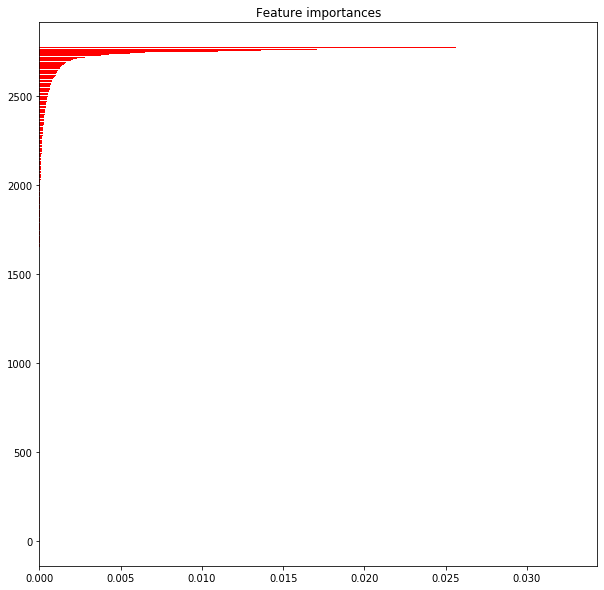

In [107]:
importances = model.steps[2][1].feature_importances_
importances = model['tree'].feature_importances_
features = X_train.columns
indices = np.argsort(importances)

# Plot the feature importances of the forest
plt.figure(figsize=(10,10))

plt.title("Feature importances")
plt.barh(range(len(importances)), importances[indices],
       color="r", align="center")
# If you want to define your own labels,
# change indices to a list of labels on the following line.
plt.yticks(range(len(importances)), features[indices])
plt.ylim([-1, len(importances)])
plt.show()
print(features)
print(importances)

### Tune hyperparameters with k-fold cross validation to optimize model performance.

In [108]:
#don't write too long lines, it's hard to read
#the starting point should be close to sklearn default values
#first do a coarse search
#find out the variance/bias trend for each parameter, and know the direction to tune
#then do a fine search
parameters = {
              'rf__max_depth': [2,3, 6, 9, 20, 50, 100], #default is None, which means infinity
              'rf__min_samples_leaf': [1, 3, 5, 10, 20],
              'rf__min_samples_split': [2, 3, 5, 8]#,
            #'rf_criterion':['mse','mae']
             }

In [109]:
scorer = make_scorer(mean_squared_error, greater_is_better = False)

In [111]:
steps = [('rescale', MinMaxScaler()),
         ('poly', PolynomialFeatures()),
         ('tree', RandomForestClassifier(n_estimators=50,n_jobs=-1))]
model = Pipeline(steps)

In [114]:
#you can even sample the data for speed
model_gsv = GridSearchCV(model, parameters, cv = 3, scoring = scorer, n_jobs=-1, return_train_score=True)

In [115]:
model_gsv = model_gsv.fit(X_train, y_train)

ValueError: Invalid parameter rf for estimator Pipeline(memory=None,
         steps=[('rescale', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('poly',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('tree',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=50, n_jobs=-1,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False))],
         verbose=False). Check the list of available parameters with `estimator.get_params().keys()`.

### TBD - XGBoost